## Rnn

In [1]:
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist=input_data.read_data_sets('./MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [3]:
# 28*28 被拉成一行了
mnist.train.images.shape

(55000, 784)

In [4]:
mnist.test.images.shape

(10000, 784)

In [5]:
mnist.validation.images.shape

(5000, 784)

In [6]:
train_x,train_y=mnist.train.next_batch(20000)

In [7]:
train_x.shape

(20000, 784)

In [8]:
# 取5000张图片
test_x, test_y = mnist.test.next_batch(5000)

## 图像的可视化

In [9]:
import matplotlib.pyplot as plt

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


<function matplotlib.pyplot.show(*args, **kw)>

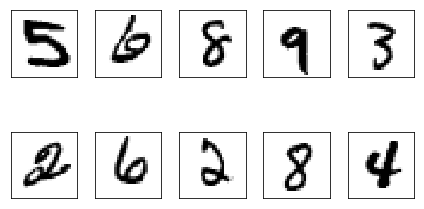

In [10]:
plt.rc('image',cmap='binary')
for i in range(10):#打印10张图
    plt.subplot(2,5,i+1)
    plt.imshow(train_x[i].reshape(28,28))
    print(train_y[i])
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()
plt.show

## 全连接神经网络

In [11]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [12]:
def model1():
    model=Sequential()
    model.add(Dense(784,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    return model

In [13]:
m=model1()

In [14]:
m.compile(optimizer='adam',loss='categorical_crossentropy')

In [16]:
history=m.fit(train_x,train_y,epochs=10,batch_size=32)

Epoch 1/10
20000/20000 [==============================] - 10s 486us/step - loss: 0.0918
Epoch 2/10
20000/20000 [==============================] - 9s 458us/step - loss: 0.0653
Epoch 3/10
20000/20000 [==============================] - 9s 461us/step - loss: 0.0462
Epoch 4/10
20000/20000 [==============================] - 9s 470us/step - loss: 0.0326
Epoch 5/10
20000/20000 [==============================] - 9s 460us/step - loss: 0.0329
Epoch 6/10
20000/20000 [==============================] - 9s 469us/step - loss: 0.0316
Epoch 7/10
20000/20000 [==============================] - 10s 479us/step - loss: 0.0277
Epoch 8/10
20000/20000 [==============================] - 9s 469us/step - loss: 0.0229
Epoch 9/10
20000/20000 [==============================] - 9s 463us/step - loss: 0.0215
Epoch 10/10
20000/20000 [==============================] - 9s 468us/step - loss: 0.0138


In [17]:
pred=m.predict(test_x)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(pred.argmax(1),test_y.argmax(1))

0.966

## LeNet

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [22]:
import os 
import random
import numpy as np 

In [23]:
data_trans=transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor()
#    transforms.Normalize(()())?<-参数mean和std来自于训练集，但是transform本身会在训练和评测的时候都会使用
])

## 图像的Normalize

- 目的：将图片进行归一化的缩放|(x-mean)/std

- 思考：图片归一化后，真的不存在小于0或者大于1的outlier了吗？ 不一定

- 思考：归一化哪部分数据？A 训练集 B 评测集 C 训练集+评测集？ A

In [24]:
np.mean(mnist.test.images)

0.13251466

In [25]:
np.std(mnist.test.images)

0.31048024

In [26]:
data_trans=transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,),(0.3081,))#参数mean和std来自于训练集，但是transform本身会在训练和评测的时候都会使用
])

In [27]:
train_data=datasets.MNIST('data',train=True,download=True,transform=data_trans)
test_data=datasets.MNIST('data',train=False,download=True,transform=data_trans)

Processing...
Done!


In [28]:
n_train=int(len(train_data)*0.9)
n_validation=len(train_data)-n_train

In [29]:
train_data,valid_data=torch.utils.data.random_split(train_data,[n_train,n_validation])

In [30]:
print(len(train_data),len(valid_data),len(test_data))

54000 6000 10000


In [31]:
batch_size=64

- 目前完成了数据集的制作

In [32]:
train_iterator=torch.utils.data.DataLoader(train_data,shuffle=True,batch_size=batch_size)
valid_iterator=torch.utils.data.DataLoader(valid_data,batch_size=batch_size)
test_iterator=torch.utils.data.DataLoader(test_data,batch_size=batch_size)

In [33]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        #第一层conv1卷积层，in_channel=1,output_channel=6,kernel_size=5*5,input_size=32*32,output_size=28*28
        self.conv1=nn.Conv2d(1,6,5)
        #第二层conv2，output_channel=6 ,kernel 5*5,output_size=10*10,input_size=14*14
        self.conv2=nn.Conv2d(6,16,5)
        
        self.fc1=nn.Linear(16*5*5,120)
        
        self.fc2=nn.Linear(120,80)
        
        self.fc3=nn.Linear(80,10)#不用增加softmax层，在cross_entropy的Loss中自动增加了Softmax
        
    def forward(self,x):
        x=F.max_pool2d(F.relu(self.conv1(x)),2)
        x=F.max_pool2d(F.relu(self.conv2(x)),2)
        x=x.view(x.shape[0],-1)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x

- 到此神经网络定义完毕

## 载入模型并训练

In [34]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [35]:
device

device(type='cpu')

In [36]:
model=LeNet().to(device)

In [37]:
model

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=80, bias=True)
  (fc3): Linear(in_features=80, out_features=10, bias=True)
)

In [38]:
optimizer=optim.Adam(model.parameters())

In [39]:
criterion=nn.CrossEntropyLoss()

## 如何评价
- 计算精确度

In [40]:
def accu(fx,y):
    pred=fx.max(1,keepdim=True)[1]
    correct=pred.eq(y.view_as(pred)).sum()#得到该batch的准确度
    acc=correct.float()/pred.shape[0]
    return acc

In [41]:
def train(model,device,iterator,optimizer,criterion):
    epoch_loss=0#积累变量
    epoch_acc=0#积累变量
    model.train()#该函数表示PHASE=Train
    
    for (x,y) in iterator:#拿去每一个minibatch
        x=x.to(device)
        y=y.to(device)
        optimizer.zero_grad()
        fx=model(x)#进行forward
        loss=criterion(fx,y)#计算Loss,train_loss
        type(loss)
        acc=accu(fx,y)#计算精确度，train_accu
        loss.backward()#进行BP
        optimizer.step()#统一更新模型
        epoch_loss+=loss.item()
        epoch_acc+=acc.item()
        
    return epoch_loss/len(iterator),epoch_acc/len(iterator)

In [42]:
def evaluate(model,device,iterator,criterion):
    epoch_loss=0
    epoch_acc=0
    model.eval()
    with torch.no_grad():
        for (x,y) in iterator:
            x=x.to(device)
            y=y.to(device)
            fx=model(x)
            loss=criterion(fx,y)
            acc=accu(fx,y)
            epoch_loss+=loss.item()
            epoch_acc+=acc.item()
    return epoch_loss/len(iterator),epoch_acc/len(iterator)

## 开始训练

In [43]:
epochs=10
model_dir='models'
model_path=os.path.join(model_dir,'lenet_mnist.pt')

In [44]:
best_valid_loss=float('inf')

In [45]:
if not os.path.isdir(model_dir):
    os.makedirs(model_dir)

In [46]:
for epoch in range(epochs):
    train_loss,train_acc=train(model,device,train_iterator,optimizer,criterion)
    valid_loss,valid_acc=evaluate(model,device,valid_iterator,criterion)
    if valid_loss<best_valid_loss:#如果是最好的模型就保存到文件夹
        best_valid_loss=valid_loss
        torch.save(model.state_dict(),model_path)
    print('Epoch:{0}|Train Loss:{1}|Train Acc:{2}|Val Loss:{3}|Val Acc:{4}'.format(epoch+1,train_loss,train_acc,valid_loss,valid_acc))

Epoch:1|Train Loss:0.233421141992354|Train Acc:0.9293666074485011|Val Loss:0.07848111389482275|Val Acc:0.9763408690056903
Epoch:2|Train Loss:0.06469552075905258|Train Acc:0.9800552922826242|Val Loss:0.06426778717085402|Val Acc:0.9793882978723404
Epoch:3|Train Loss:0.04806419984565527|Train Acc:0.9852944806712498|Val Loss:0.045799196033956525|Val Acc:0.9863696808510638
Epoch:4|Train Loss:0.03583234349062658|Train Acc:0.9888304700077427|Val Loss:0.054408073207323854|Val Acc:0.9835438829787234
Epoch:5|Train Loss:0.03144152051663265|Train Acc:0.990206605450237|Val Loss:0.03927518397648918|Val Acc:0.987533244680851
Epoch:6|Train Loss:0.024257121384761767|Train Acc:0.9923294332778849|Val Loss:0.04480919138865268|Val Acc:0.9855385638297872
Epoch:7|Train Loss:0.020660477313014427|Train Acc:0.9933167950236966|Val Loss:0.04023769577132895|Val Acc:0.988031914893617
Epoch:8|Train Loss:0.018315879111641675|Train Acc:0.9940079482387028|Val Loss:0.04630079475092761|Val Acc:0.9873116136865413
Epoch:9|

In [47]:
model.load_state_dict(torch.load(model_path))

test_loss, test_acc = evaluate(model, device, test_iterator, criterion)

print('| Test Loss: {0} | Test Acc: {1} |'.format(test_loss,test_acc))

| Test Loss: 0.034958216913376645 | Test Acc: 0.987062101910828 |
